In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

Wir erstellen einen künstlichen Datensatz

In [2]:
np.random.seed(5) #1 also interesting
X = pd.DataFrame({'var1': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*1.5 + np.random.rand(10)), 
                  'var2': np.append(np.ones(10)*1 + np.random.rand(10),np.ones(10)*1.5 + np.random.rand(10))})
y = pd.DataFrame({'Class': np.append(np.ones(10),np.zeros(10))}).Class

EDA - Visualisieren der Daten

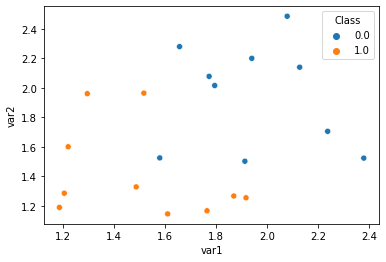

In [3]:
sns.scatterplot(data=X, x='var1', y='var2', hue=y)

scikit-learn einsetzen

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5, stratify=y)

Skalieren der Daten

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train) #in der fit Funktion nutzen wir NUR die Trainingsdaten

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train

,var1,var2
3,1.918611,1.253588
15,1.774086,2.077663
18,2.128788,2.139795
1,1.870732,1.265819
5,1.611744,1.144164
0,1.221993,1.599929
10,1.580741,1.524307
8,1.296801,1.960227
11,2.238440,1.704556
17,1.796080,2.015473


In [10]:
X_train_std = scaler.transform(X_train)

In [11]:
X_test_std = scaler.transform(X_test)

In [12]:
#output als Dataframe
X_train_std = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

In [13]:
X_test_std = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [14]:
X_train_std.head()

,var1,var2
3,0.564393,-1.182692
15,0.097778,1.166011
18,1.242976,1.343095
1,0.409811,-1.147833
5,-0.426365,-1.494563


In [15]:
X_test_std.head()

,var1,var2
19,1.084934,2.328746
9,-1.795374,-1.368444
7,-0.727679,0.841861
14,2.053842,-0.415030
6,0.071373,-1.433432


visualisieren wir unsere transformatierten Daten

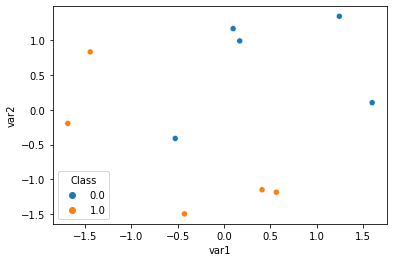

In [16]:
sns.scatterplot(data=X_train_std, x='var1', y='var2', hue=pd.Series(y_train))

trainieren wir ein Modell

In [17]:
from sklearn.svm import SVC

In [18]:
clf = SVC(kernel='linear')

In [19]:
clf.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Nun können wir Testdaten vorhersagen

In [20]:
y_pred = clf.predict(X_test_std)

evaluierung

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.8

In [23]:
from sklearn.metrics import plot_confusion_matrix

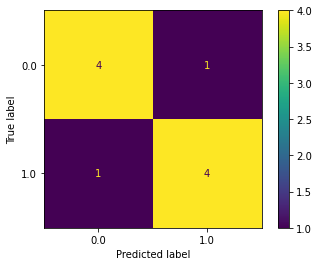

In [24]:
plot_confusion_matrix(clf, X_test_std, y_test)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

In [27]:
scores.mean()

0.9

In [28]:
def run_ML_process(X, y, clf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5, stratify=y) 
    
    #scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    plot_step = 0.02
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1.2
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1.2
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Evaluation using a 10-fold CV
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    clf.fit(X_train, y_train)
    
    fig, axs = plt.subplots(1,2, figsize = (15, 4))
    #Plot confussion matrix
    plot_confusion_matrix(clf, X_test, y_test, ax = axs[0])
    
    #Plot decisionfuctions and data points & predictions
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], alpha=0.25, c=y_train, cmap=ListedColormap(['grey','red']))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], alpha=0.25, c=y_test, cmap=ListedColormap(['grey','red']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, marker='x', s=10, cmap=ListedColormap(['grey','red']))

Averace Accuracy: 0.9


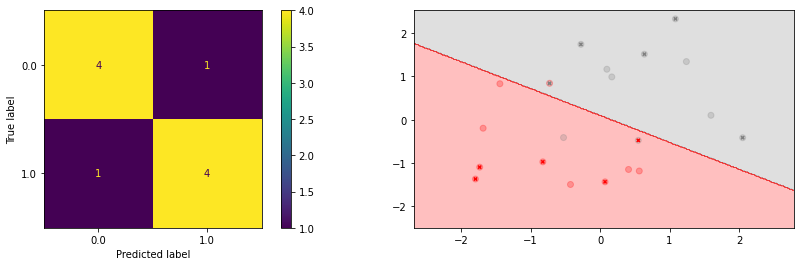

In [29]:
run_ML_process(X, y, SVC(kernel='linear'))

### Weitere Algorithmen

Logistischen Regression 

In [30]:
from sklearn.linear_model import LogisticRegression

Averace Accuracy: 0.85


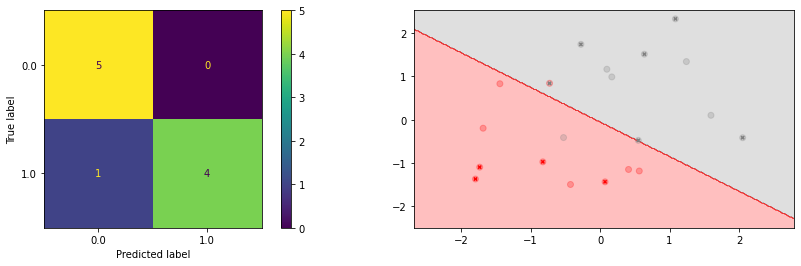

In [31]:
run_ML_process(X, y, LogisticRegression())

Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

Averace Accuracy: 0.9


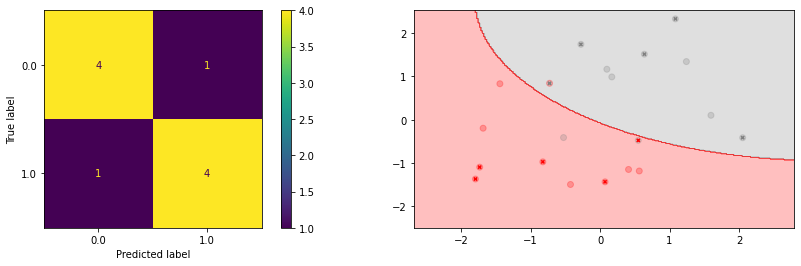

In [33]:
run_ML_process(X, y, GaussianNB())

Support Vector Machine - SVM

In [34]:
from sklearn.svm import SVC

Averace Accuracy: 0.9


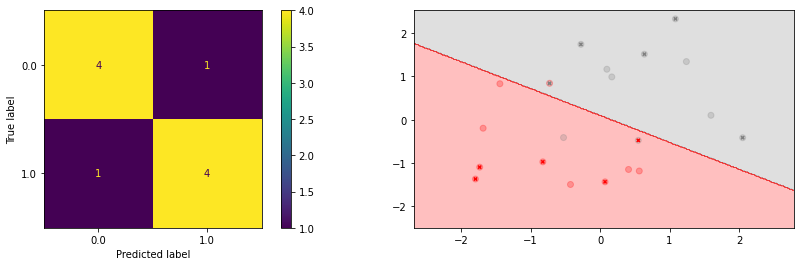

In [35]:
run_ML_process(X, y, SVC(kernel='linear'))

Averace Accuracy: 0.85


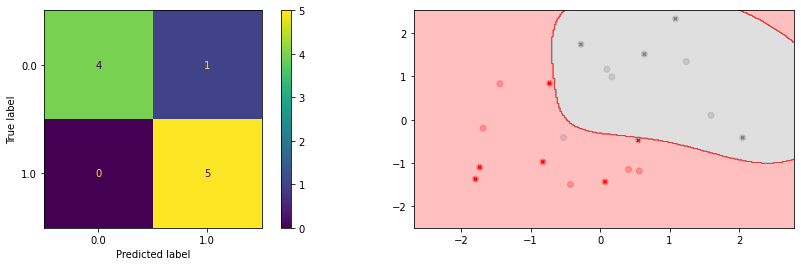

In [36]:
run_ML_process(X, y, SVC())

Entscheidungsbaum

In [37]:
from sklearn.tree import DecisionTreeClassifier

Averace Accuracy: 0.85


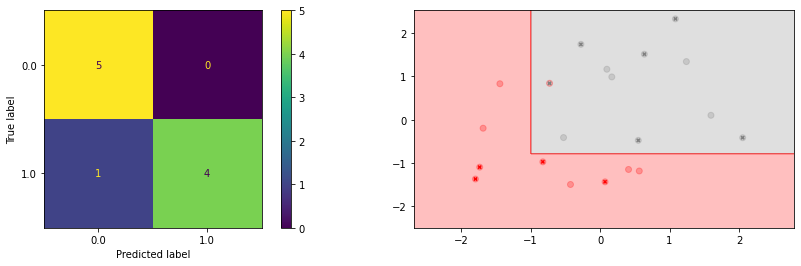

In [38]:
run_ML_process(X, y, DecisionTreeClassifier())

Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

Averace Accuracy: 0.95


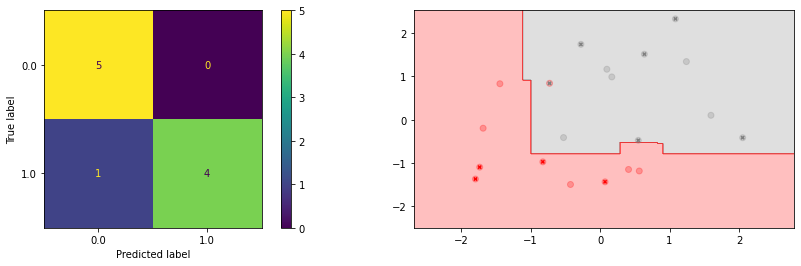

In [40]:
run_ML_process(X, y, RandomForestClassifier())

Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

Averace Accuracy: 0.85


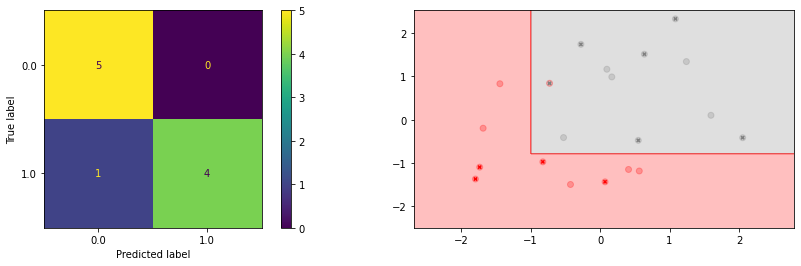

In [42]:
run_ML_process(X, y, GradientBoostingClassifier())

kNN - k-Nearest Neighbour

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Averace Accuracy: 0.8


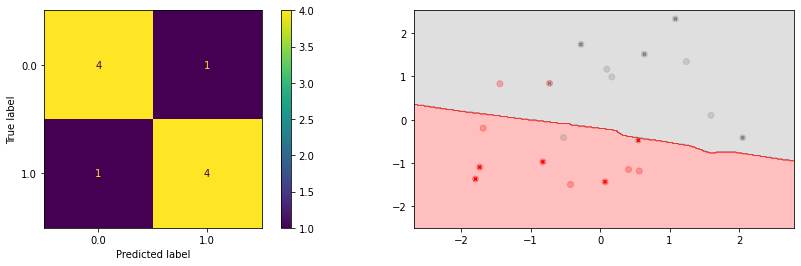

In [44]:
run_ML_process(X, y, KNeighborsClassifier())

MLP - Multilayer Perceptron

In [45]:
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Averace Accuracy: 0.9


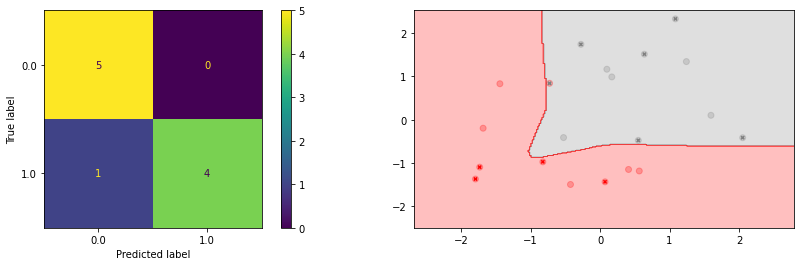

In [46]:
run_ML_process(X, y, MLPClassifier(max_iter=1000))